### Analysis of HSS Vaccine Adverse Reaction Events 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("vaers/2021VAERSDATA.csv.gz", encoding="iso-8859-1")

/tmp/ipykernel_142935/797501152.py:1: DtypeWarning: Columns (7,12,15,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("vaers/2021VAERSDATA.csv.gz", encoding="iso-8859-1")


In [4]:
df.columns

Index(['VAERS_ID', 'RECVDATE', 'STATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'SEX',
       'RPT_DATE', 'SYMPTOM_TEXT', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT',
       'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'RECOVD', 'VAX_DATE',
       'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_ADMINBY', 'V_FUNDBY',
       'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE',
       'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT',
       'ALLERGIES'],
      dtype='object')

In [5]:
df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,NaN,NaN,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,NaN,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,kidney infection,"diverticulitis, mitral valve prolapse, osteoar...","got measles from measel shot, mums from mumps ...",NaN,2,01/01/2021,NaN,NaN,NaN,"Diclofenac, novacaine, lidocaine, pickles, tom..."
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Na,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,NaN,Na


In [6]:
df.dtypes

VAERS_ID          int64
RECVDATE         object
STATE            object
AGE_YRS         float64
CAGE_YR         float64
CAGE_MO         float64
SEX              object
RPT_DATE         object
SYMPTOM_TEXT     object
DIED             object
DATEDIED         object
L_THREAT         object
ER_VISIT         object
HOSPITAL         object
HOSPDAYS        float64
X_STAY           object
DISABLE          object
RECOVD           object
VAX_DATE         object
ONSET_DATE       object
NUMDAYS         float64
LAB_DATA         object
V_ADMINBY        object
V_FUNDBY         object
OTHER_MEDS       object
CUR_ILL          object
HISTORY          object
PRIOR_VAX        object
SPLTTYPE         object
FORM_VERS         int64
TODAYS_DATE      object
BIRTH_DEFECT     object
OFC_VISIT        object
ER_ED_VISIT      object
ALLERGIES        object
dtype: object

In [7]:
df.describe()

,VAERS_ID,AGE_YRS,CAGE_YR,CAGE_MO,HOSPDAYS,NUMDAYS,FORM_VERS
count,7.464390e+05,665560.000000,597902.000000,4230.000000,31214.000000,652148.000000,746439.000000
mean,1.428016e+06,49.204891,48.851026,0.232884,11.992407,29.693456,1.998759
std,3.473513e+05,19.511801,19.689613,0.259187,800.473921,623.725560,0.035200
min,9.106420e+05,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,1.140952e+06,34.000000,34.000000,0.000000,2.000000,0.000000,2.000000
50%,1.376990e+06,50.000000,50.000000,0.200000,3.000000,1.000000,2.000000
75%,1.682744e+06,64.000000,64.000000,0.400000,6.000000,5.000000,2.000000
max,2.654803e+06,119.000000,120.000000,1.000000,99999.000000,44224.000000,2.000000


In [8]:
df.shape

(746439, 35)

In [9]:
df.set_index("VAERS_ID", inplace=True)

In [10]:
df.iloc[0]

RECVDATE                                               01/01/2021
STATE                                                          TX
AGE_YRS                                                      33.0
CAGE_YR                                                      33.0
CAGE_MO                                                       NaN
SEX                                                             F
RPT_DATE                                                      NaN
SYMPTOM_TEXT    Right side of epiglottis swelled up and hinder...
DIED                                                          NaN
DATEDIED                                                      NaN
L_THREAT                                                      NaN
ER_VISIT                                                      NaN
HOSPITAL                                                      NaN
HOSPDAYS                                                      NaN
X_STAY                                                        NaN
DISABLE   

In [11]:
df.iloc[:3]

,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,DATEDIED,...,CUR_ILL,HISTORY,PRIOR_VAX,SPLTTYPE,FORM_VERS,TODAYS_DATE,BIRTH_DEFECT,OFC_VISIT,ER_ED_VISIT,ALLERGIES
VAERS_ID,,,,,,,,,,,,,,,,,,,,,
916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,NaN,...,NaN,NaN,NaN,NaN,2,01/01/2021,NaN,Y,NaN,Pcn and bee venom
916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,NaN,...,Patient residing at nursing facility. See pati...,Patient residing at nursing facility. See pati...,NaN,NaN,2,01/01/2021,NaN,Y,NaN,"""Dairy"""
916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,2,01/01/2021,NaN,NaN,Y,Shellfish


In [13]:
df.iloc[:5, 2:4]

,AGE_YRS,CAGE_YR
VAERS_ID,,
916600,33.0,33.0
916601,73.0,73.0
916602,23.0,23.0
916603,58.0,58.0
916604,47.0,47.0


In [12]:
df["AGE_YRS"].max()

119.0

<Axes: >

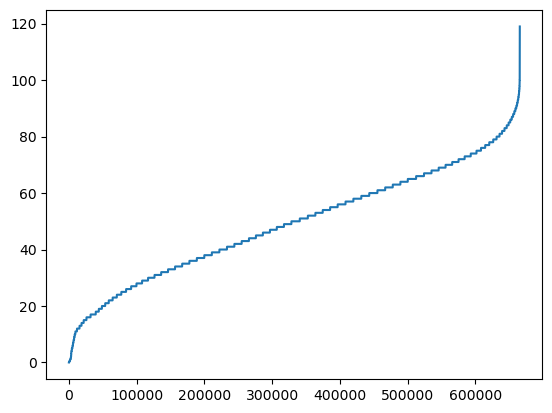

In [14]:
df["AGE_YRS"].sort_values().plot(use_index=False)

<Axes: xlabel='Frequency'>

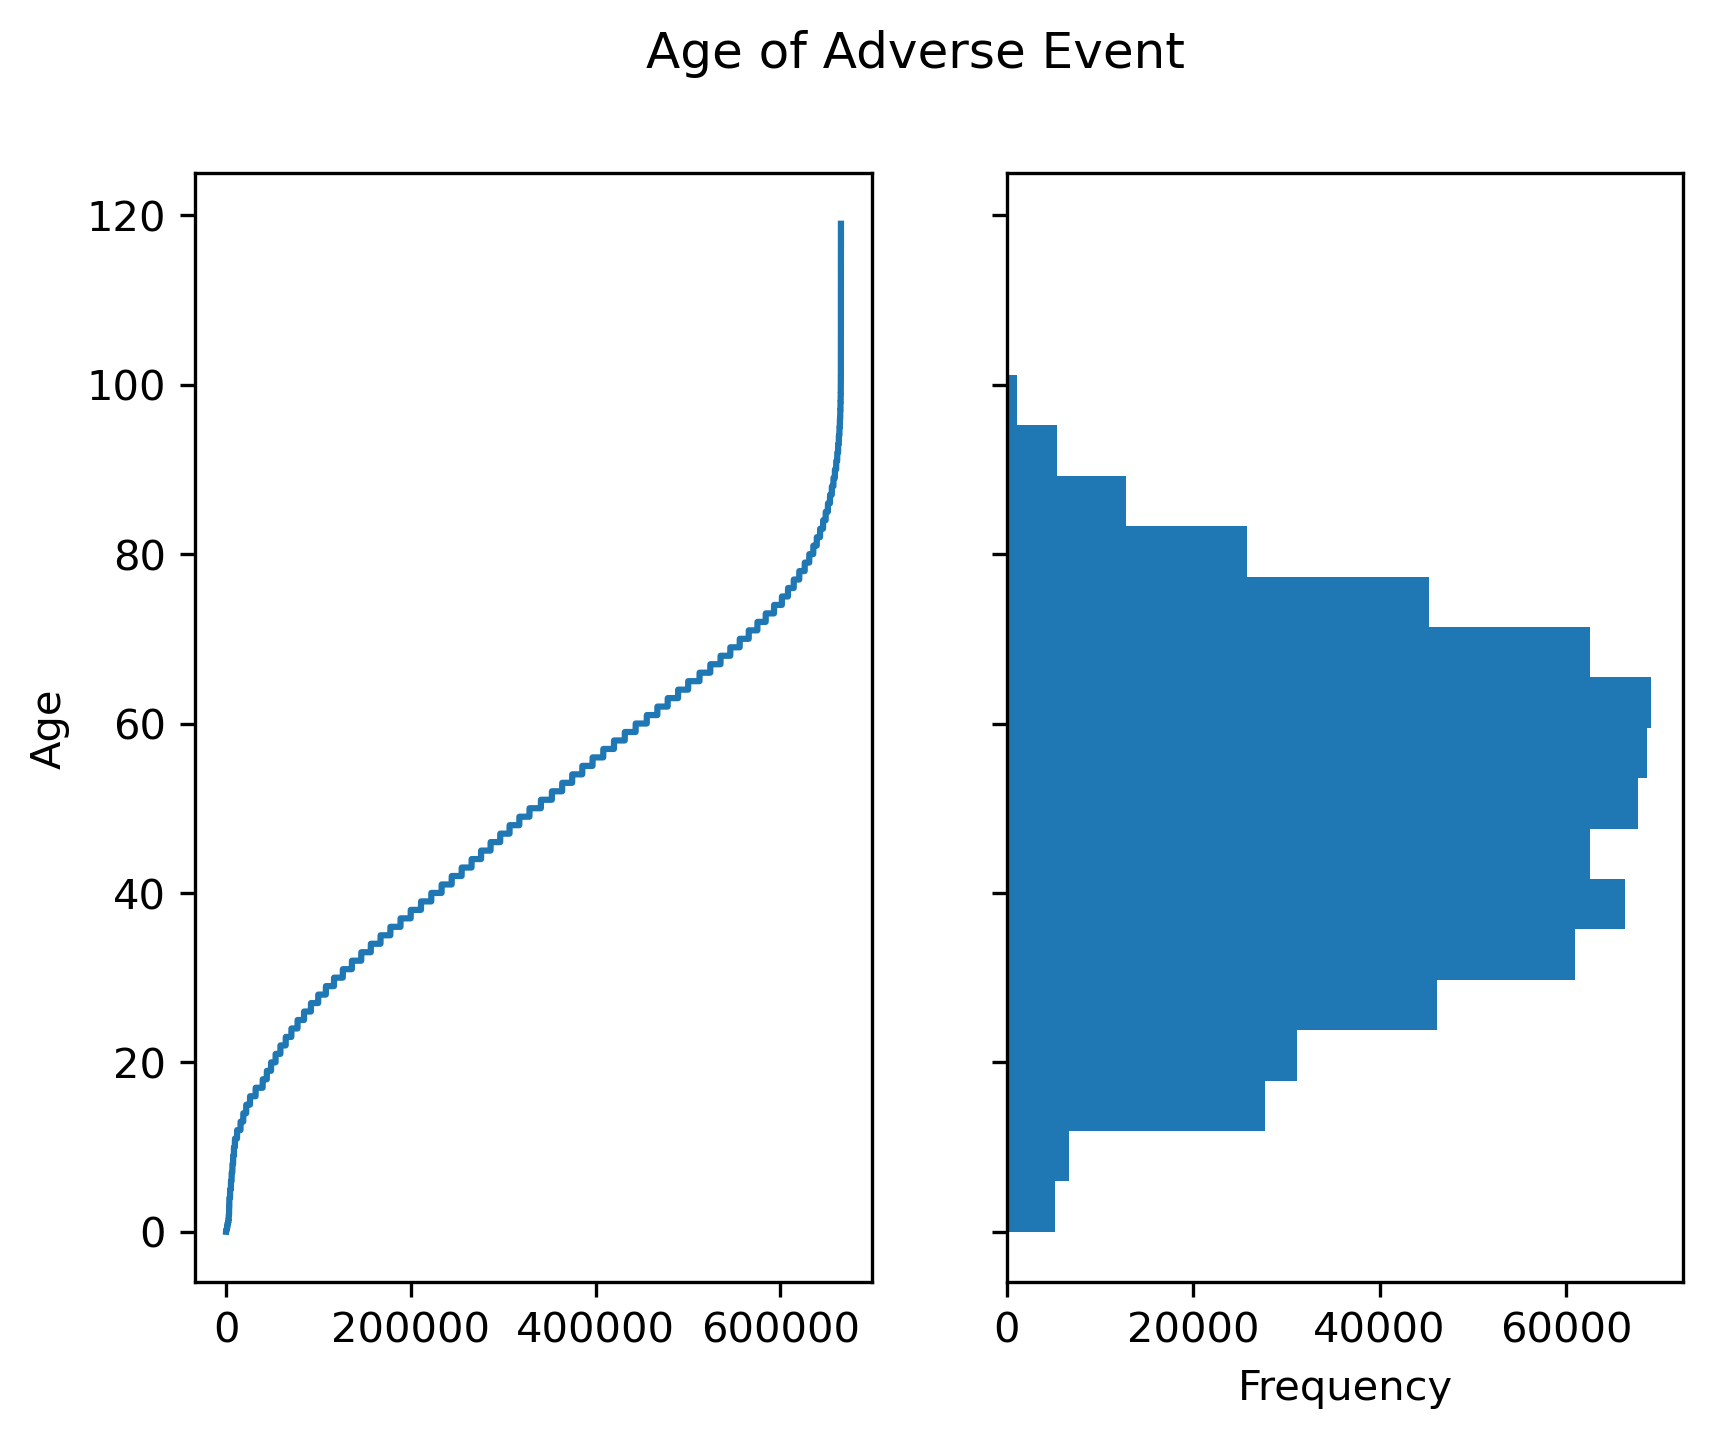

In [21]:
fig, ax = plt.subplots(1, 2, sharey=True, dpi=300)
fig.suptitle("Age of Adverse Event")
df["AGE_YRS"].sort_values().plot(
    use_index = False, ax=ax[0],
    xlabel="Obserbation", ylabel="Age"
                                )
df["AGE_YRS"].plot.hist(bins=20, orientation="horizontal")


In [24]:
df["AGE_YRS"].dropna().apply(lambda x: int(x)).value_counts()

AGE_YRS
50     12361
65     12315
60     12057
51     11902
59     11751
       ...  
115        6
119        4
106        2
113        1
109        1
Name: count, Length: 111, dtype: int64

In [25]:
df["DIED"].value_counts(dropna=False)

DIED
NaN    735872
Y       10567
Name: count, dtype: int64

In [26]:
df["is_dead"] = (df.DIED == "Y")

In [27]:
died = df[df.is_dead]

In [30]:
vaccines_df = pd.read_csv("vaers/2021VAERSVAX.csv.gz", encoding="iso-8859-1").set_index("VAERS_ID")
print(vaccines_df.columns)
print(vaccines_df.shape)
print(vaccines_df.VAX_TYPE.unique())

Index(['VAX_TYPE', 'VAX_MANU', 'VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE',
       'VAX_SITE', 'VAX_NAME'],
      dtype='object')
(790579, 7)
['COVID19' 'FLUC4' 'DTAPHEPBIP' 'HIBV' 'PNC13' 'RV1' 'UNK' 'FLU4' 'PPV'
 'FLUA3' 'VARZOS' 'MMR' 'DT' 'HPV9' 'DTAP' 'MMRV' 'TDAP' 'FLUR4'
 'DTAPIPVHIB' 'HEPA' 'MNQ' 'FLUX' 'YF' 'ANTH' 'HEP' 'VARCEL' 'RV5' 'HPV4'
 'MENB' 'IPV' 'RAB' 'FLUA4' 'FLUN4' 'DTAPIPV' 'TYP' 'ADEN_4_7' 'CHOL'
 'TTOX' 'FLU3' 'FLUC3' 'HEPAB' 'TD' 'EBZR' 'PNC' 'DF' 'HPVX' 'FLUX(H1N1)'
 'RVX' 'DTP' 'MEN' 'JEV1' 'BCG' 'PER' 'SMALL' 'OPV' 'TDAPIPV' 'FLUN3'
 'FLU(H1N1)' '6VAX-F' 'MNQHIB' 'DTPHEP' 'JEVX' 'DTPPVHBHPB' 'FLUR3' 'DTOX'
 'MU' 'HEPATYP' 'PNC10' 'H5N1' 'COVID19-2']


In [32]:
vaccines_df.groupby("VAX_TYPE").size().sort_values()

covid19 = vaccines_df[vaccines_df.VAX_TYPE == "COVID19"]
covid19_died = died.join(covid19)

In [33]:
covid19_died.index.value_counts()

VAERS_ID
1215401    10
1971984     8
1985282     3
1877266     3
1849876     3
           ..
1241672     1
1241805     1
1241873     1
1241936     1
2650168     1
Name: count, Length: 10567, dtype: int64

In [34]:
by_lot = covid19_died.groupby("VAX_LOT").size().sort_values(ascending=False)
for i, (lot, cnt) in enumerate(by_lot.items()):
    print(lot, cnt, len(covid19_died[covid19_died.VAX_LOT == lot].groupby("STATE")))
    if 1 == 10:
        break

Unknown 232 33
EN6201 157 32
unknown 127 21
EN6200 120 22
EN5318 120 29
EN6198 114 24
EL9261 112 22
EL3248 102 18
EM9810 101 21
EN6202 98 19
039K20A 97 13
EL9269 97 19
EL3249 83 21
012L20A 78 23
EL3302 76 22
EL9267 76 13
EL8982 75 19
013L20A 71 21
ER2613 70 17
010M20A 69 17
022M20A 68 14
EN6208 68 16
026A21A 67 16
EN6199 67 20
013M20A 66 13
031L20A 65 14
EL0140 64 16
EL9264 63 23
EL9265 63 16
031M20A 60 14
EJ1686 59 17
EN6204 59 20
EN6207 58 17
EL1283 57 16
EN6205 56 23
EN6203 55 20
016M20A 55 20
029L20A 55 13
037K20A 54 14
030L20A 54 19
012M20A 53 22
030M20A 52 10
024M20A 52 21
007M20A 51 21
ER8732 51 19
042A21A 51 22
025L20A 50 16
027L20A 50 9
043A21A 48 21
010A21A 47 13
EK9231 47 20
012A21A 47 13
026L20A 46 13
EL1284 45 17
015M20A 45 17
EN6206 45 18
EL9266 44 14
EL3246 44 15
ER8737 44 9
EP7533 43 16
EL0142 43 15
1805031 42 16
EJ1685 42 12
ER8727 41 16
006M20A 41 13
EL9262 41 19
030A21A 40 11
EN9581 40 14
013A21A 39 16
011A21A 39 15
011J20A 39 18
011M20A 39 15
EP7534 39 14
EL3247 39 